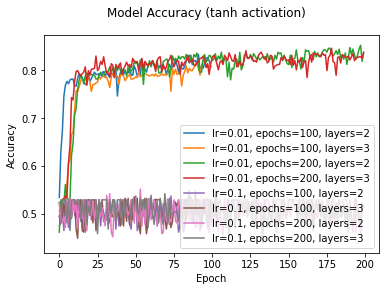

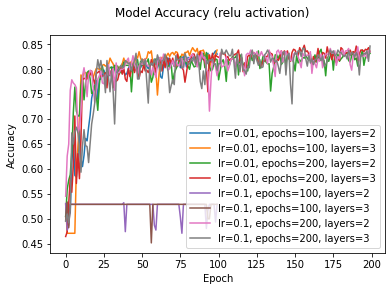

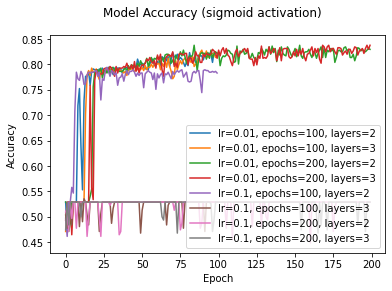

   Activation  Learning Rate  Epochs  Num Layers  Train Accuracy  \
0        tanh           0.01     100           2        0.807074   
1        tanh           0.01     100           3        0.807074   
2        tanh           0.01     200           2        0.836013   
3        tanh           0.01     200           3        0.837621   
4        tanh           0.10     100           2        0.498392   
5        tanh           0.10     100           3        0.528939   
6        tanh           0.10     200           2        0.516077   
7        tanh           0.10     200           3        0.512862   
8        relu           0.01     100           2        0.829582   
9        relu           0.01     100           3        0.837621   
10       relu           0.01     200           2        0.831190   
11       relu           0.01     200           3        0.834405   
12       relu           0.10     100           2        0.528939   
13       relu           0.10     100           3

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

df = pd.read_csv('https://raw.githubusercontent.com/swarj/MLAssignment2/main/mammographic_masses.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.astype('float')
ncols = len(df.columns)
nrows = len(df.index)
X = df.iloc[:, 0:(ncols - 1)]
y = df.iloc[:, (ncols-1)]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_test = y_test.values.reshape(-1, 1)

activations = ['tanh', 'relu', 'sigmoid']
learning_rates = [0.01, 0.1]
num_epochs = [100, 200]
num_hidden_layers = [2, 3]
results = []
for activation in activations:
    plt.figure()
    plt.suptitle(f'Model Accuracy ({activation} activation)')
    for lr in learning_rates:
        for epoch in num_epochs:
            for num_layers in num_hidden_layers:
                model = Sequential()
                model.add(Dense(8, input_dim=X_train.shape[1], activation=activation))
                for i in range(num_layers):
                    model.add(Dense(8, activation=activation))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
                history = model.fit(X_train, y_train, epochs=epoch, batch_size=100, verbose=0, validation_data=(X_test, y_test))
                train_acc = history.history['accuracy'][-1]
                test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
                train_error = 1 - train_acc
                test_error = 1 - test_acc
                results.append([activation, lr, epoch, num_layers, train_acc, test_acc, train_error, test_error])
                label = f'lr={lr}, epochs={epoch}, layers={num_layers}'
                plt.plot(history.history['accuracy'], label=label)
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

columns = ['Activation', 'Learning Rate', 'Epochs', 'Num Layers', 'Train Accuracy', 'Test Accuracy', 'Train Error', 'Test Error']
df_results = pd.DataFrame(results, columns=columns)
print(df_results) 